In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dataset2.csv")

In [3]:
df.head()


,product_id,user_id,department_id,department,sum_reordered
0,1,138,19,snacks,1
1,1,709,19,snacks,0
2,1,764,19,snacks,1
3,1,777,19,snacks,0
4,1,825,19,snacks,0


In [4]:
df['reordered_atleast_once'] = (df['sum_reordered'].astype(bool).astype(int))
# reoredered_once_df = df[df['sum_reordered' == ]].groupby('department_id', as_index=False).agg({'product_id': ['count']})

In [5]:
df.head(11)

,product_id,user_id,department_id,department,sum_reordered,reordered_atleast_once
0,1,138,19,snacks,1,1
1,1,709,19,snacks,0,0
2,1,764,19,snacks,1,1
3,1,777,19,snacks,0,0
4,1,825,19,snacks,0,0
5,1,910,19,snacks,0,0
6,1,1052,19,snacks,1,1
7,1,1379,19,snacks,0,0
8,1,1480,19,snacks,2,1
9,1,1494,19,snacks,2,1


In [6]:
X_train = df[['product_id', 'user_id', 'department_id']][:int(len(df)*0.7)]
Y_train = df['reordered_atleast_once'][:int(len(df)*0.7)]

In [7]:
X_train.head()

,product_id,user_id,department_id
0,1,138,19
1,1,709,19
2,1,764,19
3,1,777,19
4,1,825,19


In [8]:
Y_train.head()

0    1
1    0
2    1
3    0
4    0
Name: reordered_atleast_once, dtype: int64

In [9]:
k10 = np.sum(Y_train==0)
k11 = np.sum(Y_train==1)
prob = k10/(k10+k11)
prob

0.5994450578741002

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X_train, Y_train, test_size=0.30, random_state=42)

In [11]:
X_train.shape, y_train.shape, y_train.sum()

((6520896, 3), (6520896,), 2612539)

In [12]:
model = LinearRegression()

In [13]:
model.fit(X_train, y_train)

LinearRegression()

In [14]:
r_sq = model.score(X_train, y_train)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.002273752117885497


In [15]:
print('intercept:', model.intercept_)

intercept: 0.4252384530220822


In [16]:
print('slope:', model.coef_)

slope: [ 7.28614844e-07 -1.15685994e-08 -3.55729743e-03]


In [17]:
y_pred = model.predict(X_train)
print('predicted response:', y_pred, sep='\n')

predicted response:
[0.39283817 0.43085058 0.40567086 ... 0.4251094  0.3845719  0.42826676]


In [18]:
clf = LogisticRegression(random_state=1).fit(X_train, y_train)

In [19]:
y_pred = clf.predict(X_test)
print(clf.score(X_test, y_test))

0.5996461120633205


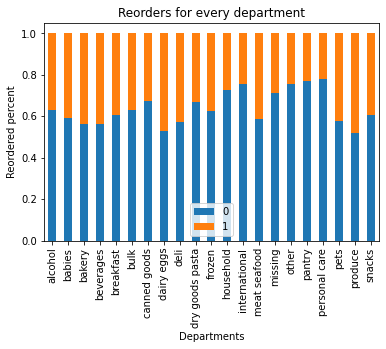

In [24]:
table = pd.crosstab(df['department'], df['reordered_atleast_once'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Reorders for every department')
plt.xlabel('Departments')
plt.ylabel('Reordered percent')
plt.legend(loc='lower center')